Importing Libraries

In [ ]:
import bs4
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/Michael_Jordan')
    # create a BeautifulSoup object to parse the HTML
soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
table = soup.find(class_='wikitable sortable')

In [ ]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Michael Jordan - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5e5a6347-ccd4-4bb9-a202-caea2178e390","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Michael_Jordan","wgTitle":"Michael Jordan","wgCurRevisionId":1018214737,"wgRevisionId":1018214737,"wgArticleId":20455,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 Italian-language sources (it)","Webarchive template webcite links","Wikipedia indefinitely move-protected pages","Articles wi

In [ ]:
table

<table class="wikitable sortable" style="text-align:right;">
<caption>
</caption>
<tbody><tr>
<th scope="col">Year
</th>
<th scope="col">Team
</th>
<th scope="col"><abbr title="Games played">GP</abbr>
</th>
<th scope="col"><abbr title="Games started">GS</abbr>
</th>
<th scope="col"><abbr title="Minutes per game">MPG</abbr>
</th>
<th scope="col"><abbr title="Field goal percentage">FG%</abbr>
</th>
<th scope="col"><abbr title="3-point field-goal percentage">3P%</abbr>
</th>
<th scope="col"><abbr title="Free-throw percentage">FT%</abbr>
</th>
<th scope="col"><abbr title="Rebounds per game">RPG</abbr>
</th>
<th scope="col"><abbr title="Assists per game">APG</abbr>
</th>
<th scope="col"><abbr title="Steals per game">SPG</abbr>
</th>
<th scope="col"><abbr title="Blocks per game">BPG</abbr>
</th>
<th scope="col"><abbr title="Points per game">PPG</abbr>
</th></tr>
<tr>
<td style="text-align:left;"><span class="nowrap"><a href="/wiki/1984%E2%80%9385_NBA_season" title="1984–85 NBA season">1984–8

In [ ]:
headers = table.tr
titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
data = {title['title']: [] for title in titles}

In [ ]:
headers

<tr>
<th scope="col">Year
</th>
<th scope="col">Team
</th>
<th scope="col"><abbr title="Games played">GP</abbr>
</th>
<th scope="col"><abbr title="Games started">GS</abbr>
</th>
<th scope="col"><abbr title="Minutes per game">MPG</abbr>
</th>
<th scope="col"><abbr title="Field goal percentage">FG%</abbr>
</th>
<th scope="col"><abbr title="3-point field-goal percentage">3P%</abbr>
</th>
<th scope="col"><abbr title="Free-throw percentage">FT%</abbr>
</th>
<th scope="col"><abbr title="Rebounds per game">RPG</abbr>
</th>
<th scope="col"><abbr title="Assists per game">APG</abbr>
</th>
<th scope="col"><abbr title="Steals per game">SPG</abbr>
</th>
<th scope="col"><abbr title="Blocks per game">BPG</abbr>
</th>
<th scope="col"><abbr title="Points per game">PPG</abbr>
</th></tr>

In [ ]:
titles

[<abbr title="Games played">GP</abbr>,
 <abbr title="Games started">GS</abbr>,
 <abbr title="Minutes per game">MPG</abbr>,
 <abbr title="Field goal percentage">FG%</abbr>,
 <abbr title="3-point field-goal percentage">3P%</abbr>,
 <abbr title="Free-throw percentage">FT%</abbr>,
 <abbr title="Rebounds per game">RPG</abbr>,
 <abbr title="Assists per game">APG</abbr>,
 <abbr title="Steals per game">SPG</abbr>,
 <abbr title="Blocks per game">BPG</abbr>,
 <abbr title="Points per game">PPG</abbr>]

In [ ]:
data

{'3-point field-goal percentage': [],
 'Assists per game': [],
 'Blocks per game': [],
 'Field goal percentage': [],
 'Free-throw percentage': [],
 'Games played': [],
 'Games started': [],
 'Minutes per game': [],
 'Points per game': [],
 'Rebounds per game': [],
 'Steals per game': []}

In [ ]:
for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
      for key, a in zip(data.keys(),row.find_all('td')[2:]):
          data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
      Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
      for key in data.keys():
        data[key] = list(map(lambda x: float(x), data[key][:Min]))

In [ ]:
data

{'3-point field-goal percentage': [0.173,
  0.167,
  0.182,
  0.132,
  0.276,
  0.376,
  0.312,
  0.27,
  0.352,
  0.5,
  0.427,
  0.374,
  0.238,
  0.189,
  0.291,
  0.173,
  0.167,
  0.182,
  0.132,
  0.276,
  0.376,
  0.312,
  0.27,
  0.352,
  0.5,
  0.427,
  0.374,
  0.238,
  0.189,
  0.291],
 'Assists per game': [5.9,
  2.9,
  4.6,
  5.9,
  8.0,
  6.3,
  5.5,
  6.1,
  5.5,
  5.3,
  4.3,
  4.3,
  3.5,
  5.2,
  3.8,
  5.9,
  2.9,
  4.6,
  5.9,
  8.0,
  6.3,
  5.5,
  6.1,
  5.5,
  5.3,
  4.3,
  4.3,
  3.5,
  5.2,
  3.8],
 'Blocks per game': [0.8,
  1.2,
  1.5,
  1.6,
  0.8,
  0.7,
  1.0,
  0.9,
  0.8,
  0.8,
  0.5,
  0.5,
  0.5,
  0.4,
  0.5,
  0.8,
  1.2,
  1.5,
  1.6,
  0.8,
  0.7,
  1.0,
  0.9,
  0.8,
  0.8,
  0.5,
  0.5,
  0.5,
  0.4,
  0.5],
 'Field goal percentage': [0.515,
  0.457,
  0.482,
  0.535,
  0.538,
  0.526,
  0.539,
  0.519,
  0.495,
  0.411,
  0.495,
  0.486,
  0.465,
  0.416,
  0.445,
  0.515,
  0.457,
  0.482,
  0.535,
  0.538,
  0.526,
  0.539,
  0.519,
  0.495,


Defining the function for our Data Scraping

In [ ]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')
    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key


    #we iterate over each table row by fining each table tag tr and assign it to the object
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data


Starting of with a function we ahve taken tthe url and passed to the request library and then we have recieved the data in the format of html whi inturn passed  it into the beatuifulsoup 4 library for html

In [ ]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant', ]
names=['Michael Jordan','Kobe Bryant']

In [ ]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan','https://en.wikipedia.org/wiki/Kobe_Bryant','https://en.wikipedia.org/wiki/LeBron_James','https://en.wikipedia.org/wiki/Kevin_Durant','https://en.wikipedia.org/wiki/Stephen_Curry','https://en.wikipedia.org/wiki/James_Harden','https://en.wikipedia.org/wiki/Chris_Paul','https://en.wikipedia.org/wiki/Anthony_Davis','https://en.wikipedia.org/wiki/Tim_Duncan','https://en.wikipedia.org/wiki/Dwyane_Wade' ]
names=['Michael Jordan','Kobe Bryant','lebron james','kevin durant','stephen curry','james harden','chris paul','anthony davis','tim duncan','dwyane wade']

In [ ]:
michael_jordan_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])


In [ ]:
michael_jordan_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])
lebron_james_dict=get_basketball_stats(links[2])
kevin_durant_dict=get_basketball_stats(links[3])
stephen_curry_dict=get_basketball_stats(links[4])
james_harden_dict=get_basketball_stats(links[5])
chris_paul_dict=get_basketball_stats(links[6])
anthony_davis_dict=get_basketball_stats(links[7])
tim_duncan_dict=get_basketball_stats(links[8])
dwyane_wade_dict=get_basketball_stats(links[9])

In [ ]:
mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)


In [ ]:
mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
lj_table = pd.DataFrame(lebron_james_dict)
kd_table = pd.DataFrame(kevin_durant_dict)
sc_table = pd.DataFrame(stephen_curry_dict)
jh_table = pd.DataFrame(james_harden_dict)
cp_table = pd.DataFrame(chris_paul_dict)
ad_table = pd.DataFrame(anthony_davis_dict)
td_table = pd.DataFrame(tim_duncan_dict)
dw_table = pd.DataFrame(dwyane_wade_dict)

In [ ]:
mj_table
kb_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2
6,82.0,82.0,41.5,0.451,0.383,0.843,6.9,5.9,2.2,0.8,30.0
7,65.0,64.0,37.6,0.438,0.327,0.852,5.5,5.1,1.7,0.4,24.0
8,66.0,66.0,40.7,0.433,0.339,0.816,5.9,6.0,1.3,0.8,27.6
9,80.0,80.0,41.0,0.450,0.347,0.850,5.3,4.5,1.8,0.4,35.4


In [ ]:
mj_table
kb_table
lj_table
kd_table
sc_table
jh_table
cp_table
ad_table
td_table
dw_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,61.0,56.0,34.9,0.465,0.302,0.747,4.0,4.5,1.4,0.6,16.2
1,77.0,77.0,38.6,0.478,0.289,0.762,5.2,6.8,1.6,1.1,24.1
2,75.0,75.0,38.6,0.495,0.171,0.783,5.7,6.7,1.9,0.8,27.2
3,51.0,50.0,37.9,0.491,0.266,0.807,4.7,7.5,2.1,1.2,27.4
4,51.0,49.0,38.3,0.469,0.286,0.758,4.2,6.9,1.7,0.7,24.6
5,79.0,79.0,38.6,0.491,0.317,0.765,5.0,7.5,2.2,1.3,30.2
6,77.0,77.0,36.3,0.476,0.300,0.761,4.8,6.5,1.8,1.1,26.6
7,76.0,76.0,37.1,0.500,0.306,0.758,6.4,4.6,1.5,1.1,25.5
8,49.0,49.0,33.2,0.497,0.268,0.791,4.8,4.6,1.7,1.3,22.1
9,69.0,69.0,34.7,0.521,0.258,0.725,5.0,5.1,1.9,0.8,21.2


In [ ]:
frames=[mj_table,kb_table,lj_table,kd_table,sc_table,jh_table,cp_table,ad_table,td_table,dw_table]
result = pd.concat(frames)

In [ ]:
result

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
...,...,...,...,...,...,...,...,...,...,...,...
12,74.0,73.0,30.5,0.456,0.159,0.793,4.1,4.6,1.1,0.6,19.0
13,60.0,59.0,29.9,0.434,0.310,0.794,4.5,3.8,1.4,0.7,18.3
14,46.0,3.0,23.2,0.455,0.329,0.701,3.9,3.5,0.9,0.7,11.2
15,21.0,0.0,22.2,0.409,0.220,0.745,3.4,3.1,0.9,0.7,12.0


In [ ]:
list_table =[mj_table, kb_table,lj_table,kd_table,sc_table,jh_table,cp_table,ad_table,td_table,dw_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].head(6))
    i += 1

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2


lebron james


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4


kevin durant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,80.0,34.6,0.430,0.288,0.873,4.4,2.4,1.0,0.9,20.3
1,74.0,74.0,39.0,0.476,0.422,0.863,6.5,2.8,1.3,0.7,25.3
2,82.0,82.0,39.5,0.476,0.365,0.900,7.6,2.8,1.4,1.0,30.1
3,78.0,78.0,38.9,0.462,0.350,0.880,6.8,2.7,1.1,1.0,27.7
4,66.0,66.0,38.6,0.496,0.387,0.860,8.0,3.5,1.3,1.2,28.0
5,81.0,81.0,38.5,0.510,0.416,0.905,7.9,4.6,1.4,1.3,28.1


stephen curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8


james harden


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,76.0,0.0,22.9,0.403,0.375,0.808,3.2,1.8,1.1,0.3,9.9
1,82.0,5.0,26.7,0.436,0.349,0.843,3.1,2.1,1.1,0.3,12.2
2,62.0,2.0,31.4,0.491,0.390,0.846,4.1,3.7,1.0,0.2,16.8
3,78.0,78.0,38.3,0.438,0.368,0.851,4.9,5.8,1.8,0.5,25.9
4,73.0,73.0,38.0,0.456,0.366,0.866,4.7,6.1,1.6,0.4,25.4
5,81.0,81.0,36.8,0.440,0.375,0.868,5.7,7.0,1.9,0.7,27.4


chris paul


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,78.0,78.0,36.0,0.430,0.282,0.847,5.1,7.8,2.2,0.1,16.1
1,64.0,64.0,36.8,0.437,0.350,0.818,4.4,8.9,1.8,0.0,17.3
2,80.0,80.0,37.6,0.488,0.369,0.851,4.0,11.6,2.7,0.1,21.1
3,78.0,78.0,38.5,0.503,0.364,0.868,5.5,11.0,2.8,0.1,22.8
4,45.0,45.0,38.0,0.493,0.409,0.847,4.2,10.7,2.1,0.2,18.7
5,80.0,80.0,36.0,0.463,0.388,0.878,4.1,9.8,2.4,0.1,15.8


anthony davis


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,64.0,60.0,28.8,0.516,0.000,0.751,8.2,1.0,1.2,1.8,13.5
1,67.0,66.0,35.2,0.519,0.222,0.791,10.0,1.6,1.3,2.8,20.8
2,68.0,68.0,36.1,0.535,0.083,0.805,10.2,2.2,1.5,2.9,24.4
3,61.0,61.0,35.5,0.493,0.324,0.758,10.3,1.9,1.3,2.0,24.3
4,75.0,75.0,36.1,0.505,0.299,0.802,11.8,2.1,1.3,2.2,28.0
5,75.0,75.0,36.4,0.534,0.340,0.828,11.1,2.3,1.5,2.6,28.1


tim duncan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,39.1,0.549,0.000,0.662,11.9,2.7,0.7,2.5,21.1
1,50.0,50.0,39.3,0.495,0.143,0.690,11.4,2.4,0.9,2.5,21.7
2,74.0,74.0,38.9,0.490,0.091,0.761,12.4,3.2,0.9,2.2,23.2
3,82.0,82.0,38.7,0.499,0.259,0.618,12.2,3.0,0.9,2.3,22.2
4,82.0,82.0,40.6,0.508,0.100,0.799,12.7,3.7,0.7,2.5,25.5
5,81.0,81.0,39.3,0.513,0.273,0.710,12.9,3.9,0.7,2.9,23.3


dwyane wade


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,61.0,56.0,34.9,0.465,0.302,0.747,4.0,4.5,1.4,0.6,16.2
1,77.0,77.0,38.6,0.478,0.289,0.762,5.2,6.8,1.6,1.1,24.1
2,75.0,75.0,38.6,0.495,0.171,0.783,5.7,6.7,1.9,0.8,27.2
3,51.0,50.0,37.9,0.491,0.266,0.807,4.7,7.5,2.1,1.2,27.4
4,51.0,49.0,38.3,0.469,0.286,0.758,4.2,6.9,1.7,0.7,24.6
5,79.0,79.0,38.6,0.491,0.317,0.765,5.0,7.5,2.2,1.3,30.2


In [ ]:
import matplotlib.pyplot as plt

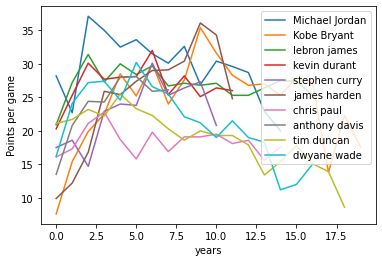

In [ ]:

j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

In [ ]:
csv_name = 'MJ1.csv'
mj_table.to_csv(csv_name)